<a href="https://colab.research.google.com/github/anshraz27/Handwritten-digit-recognition-system/blob/main/nn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_f = X_train.reshape(len(X_train),28*28)
X_test_f = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_f.shape

(60000, 784)

In [ ]:
X_train_f[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train[0]

5

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_f, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4715 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_f, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9257


[0.2686232924461365, 0.9257000088691711]

In [ ]:
y_pred = model.predict(X_test_f)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred[2]

array([3.5507791e-04, 9.9149781e-01, 6.2672496e-01, 3.5293582e-01,
       2.8987601e-02, 9.9797294e-02, 1.7411707e-01, 1.7066309e-01,
       4.1722843e-01, 6.0018539e-02], dtype=float32)

In [ ]:
np.argmax(y_pred[2])

1

In [ ]:
y_pred_lables = [ np.argmax(i) for i  in y_pred]
y_pred_lables[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    4,    8,    2,    2,    0],
       [   0, 1106,    3,    2,    0,    1,    4,    2,   17,    0],
       [   8,    8,  919,   18,    8,    4,   13,   10,   39,    5],
       [   3,    0,   16,  931,    0,   16,    2,   10,   21,   11],
       [   1,    1,    2,    1,  912,    0,   13,    4,    8,   40],
       [   9,    1,    2,   46,   10,  754,   19,    7,   36,    8],
       [  10,    3,    4,    1,    7,    7,  920,    2,    4,    0],
       [   2,    5,   20,    6,    7,    0,    0,  947,    3,   38],
       [   8,    3,    6,   20,    9,   18,   10,   10,  876,   14],
       [  10,    5,    1,    7,   23,    5,    0,   18,    9,  931]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

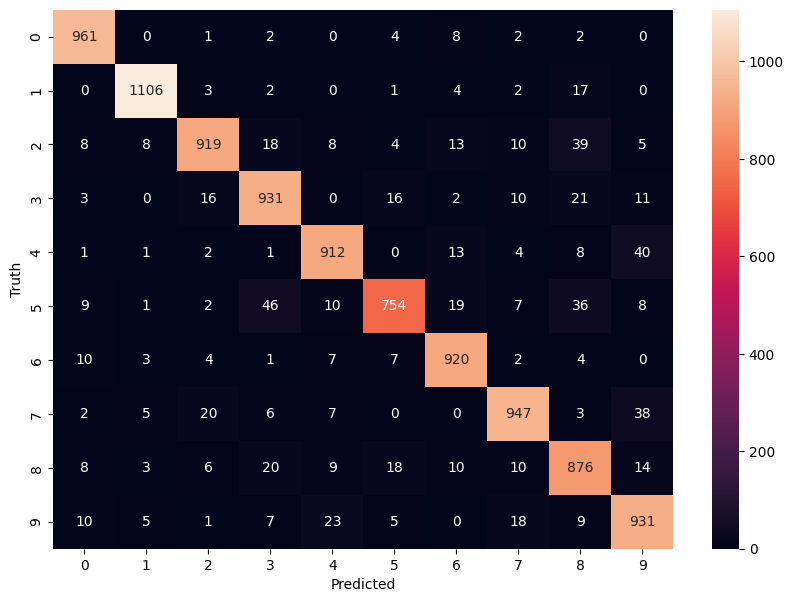

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(120, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_f, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2638 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0781 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - accuracy: 0.9854


In [ ]:
model.evaluate(X_test_f, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9751


[0.07825912535190582, 0.9750999808311462]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

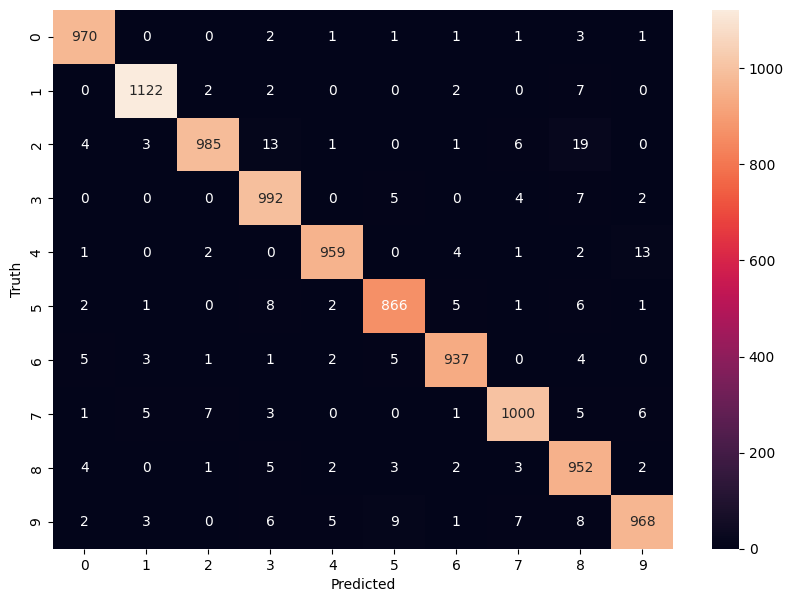

In [ ]:
y_pred = model.predict(X_test_f)
y_pred_lables = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lables)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')